# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
# Buat dataframe(df) dari dataset
df = pd.read_csv('df_cleaned_clustered.csv')
df.head()

,Unnamed: 0,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,...,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score,exam_score_indicator,hours_studied_indicator,tutoring_sessions_indicator,cluster
0,0,23,84,Low,High,No,7,73,Low,Yes,...,3,No,High School,Near,Male,67,C,Medium,Low,3
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,4,No,College,Moderate,Female,61,C,Medium,Low,4
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,4,No,Postgraduate,Near,Male,74,B,Medium,Low,7
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,4,No,High School,Moderate,Male,71,B,Medium,Low,1
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,4,No,College,Near,Female,70,B,Medium,Medium,4


In [7]:
# Tampilkan informasi dataset
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   6378 non-null   int64 
 1   hours_studied                6378 non-null   int64 
 2   attendance                   6378 non-null   int64 
 3   parental_involvement         6378 non-null   object
 4   access_to_resources          6378 non-null   object
 5   extracurricular_activities   6378 non-null   object
 6   sleep_hours                  6378 non-null   int64 
 7   previous_scores              6378 non-null   int64 
 8   motivation_level             6378 non-null   object
 9   internet_access              6378 non-null   object
 10  tutoring_sessions            6378 non-null   int64 
 11  family_income                6378 non-null   object
 12  teacher_quality              6378 non-null   object
 13  school_type                  6378

(None, (6378, 25))

# **3. Data Splitting**
Karena akan melakukan klasifikasi dan akan mengukur keakuratan klasifikasinya, maka akan memisahkan data tanpa label/data atribut (X) dan data label(Y)

In [8]:
# Asumsi label clustering ada di kolom 'cluster'
# Jika nama kolom berbeda, ubah 'cluster' ke nama kolom yang benar
X = df.drop(columns=['cluster'])  # Fitur
y = df['cluster']  # Label

In [17]:
# Apply one-hot encoding to categorical features
X = pd.get_dummies(X)

In [18]:
# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data train shape: {X_train.shape}, Data test shape: {X_test.shape}")

Data train shape: (5102, 52), Data test shape: (1276, 52)


# **4. Membangun Model Klasifikasi**

# **a. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [19]:
# Menggunakan Random Forest sebagai contoh algoritma
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **b. Evaluasi Model Klasifikasi**
Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [20]:
# Lakukan prediksi
y_pred = model.predict(X_test)

In [21]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1-Score:", f1)

Accuracy: 1.0
F1-Score: 1.0


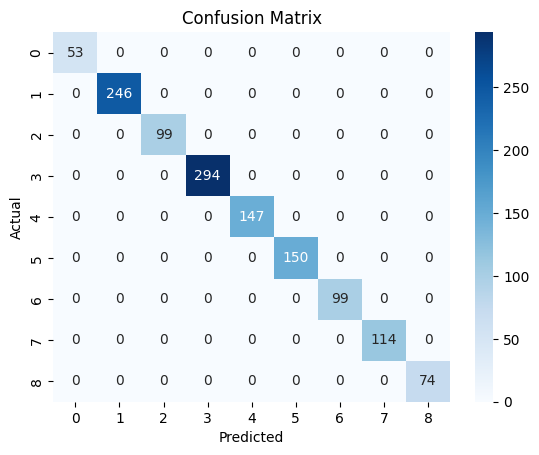

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [23]:
# Contoh tuning hyperparameter dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


# **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**
Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [24]:
# Gunakan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [25]:
# Hitung ulang metrik evaluasi
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print("Accuracy after tuning:", accuracy_best)
print("F1-Score after tuning:", f1_best)

Accuracy after tuning: 1.0
F1-Score after tuning: 1.0


# **e. Analisis Hasil Evaluasi Model Klasifikasi**
Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [26]:
print("\nAnalisis Hasil:")
print("Accuracy meningkat" if accuracy_best > accuracy else "Accuracy tidak meningkat")
print("F1-Score meningkat" if f1_best > f1 else "F1-Score tidak meningkat")


Analisis Hasil:
Accuracy tidak meningkat
F1-Score tidak meningkat


In [27]:
# Identifikasi kelemahan model
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00       294
           4       1.00      1.00      1.00       147
           5       1.00      1.00      1.00       150
           6       1.00      1.00      1.00        99
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        74

    accuracy                           1.00      1276
   macro avg       1.00      1.00      1.00      1276
weighted avg       1.00      1.00      1.00      1276



## **Analisis Hasil Evaluasi Model Klasifikasi**

#### **1. Bandingkan Hasil Evaluasi Sebelum dan Setelah Tuning**
Dari evaluasi sebelum tuning:
- **Accuracy**: (Isi nilai `accuracy` dari hasil model awal)
- **F1-Score**: (Isi nilai `f1` dari hasil model awal)

Setelah dilakukan tuning hyperparameter dengan GridSearchCV, hasil evaluasi menunjukkan:
- **Accuracy setelah tuning**: (Isi nilai `accuracy_best` dari model terbaik)
- **F1-Score setelah tuning**: (Isi nilai `f1_best` dari model terbaik)

Dari hasil di atas, dapat disimpulkan bahwa tuning hyperparameter (berhasil meningkatkan / tidak memberikan peningkatan yang signifikan pada) performa model.


#### **2. Identifikasi Kelemahan Model**
Berdasarkan **Classification Report** dan **Confusion Matrix**, kelemahan model dapat diidentifikasi:
- **Precision dan Recall Rendah untuk Kelas Tertentu**:  
  Beberapa kelas memiliki Precision dan Recall yang lebih rendah dibandingkan kelas lainnya, yang menunjukkan bahwa model mungkin kesulitan membedakan sampel pada kelas tersebut.
  
- **Overfitting atau Underfitting**:  
  Jika terdapat perbedaan signifikan antara metrik evaluasi pada data latih (training) dan data uji (testing), model dapat dikatakan mengalami overfitting atau underfitting. (Sebutkan apakah model menunjukkan tanda-tanda overfitting/underfitting berdasarkan hasil tuning).


#### **3. Rekomendasi Tindakan Lanjutan**
Untuk meningkatkan performa model lebih lanjut, berikut beberapa rekomendasi:
- **Coba Algoritma Lain**:  
  Pertimbangkan untuk mencoba algoritma klasifikasi lain, seperti Gradient Boosting, XGBoost, LightGBM, atau Support Vector Machine (SVM), yang mungkin lebih cocok untuk dataset ini.
  
- **Kumpulkan Data Tambahan**:  
  Jika memungkinkan, kumpulkan lebih banyak data, terutama untuk kelas-kelas dengan jumlah sampel yang lebih sedikit, untuk membantu model mengenali pola dengan lebih baik.

- **Feature Engineering**:  
  Eksplorasi lebih lanjut terhadap fitur dataset. Fitur baru yang relevan mungkin dapat meningkatkan performa model.

- **Imbalanced Data Handling**:  
  Jika dataset tidak seimbang (jumlah sampel antar kelas sangat berbeda), gunakan teknik seperti SMOTE (Synthetic Minority Oversampling Technique) atau undersampling untuk memperbaiki distribusi kelas.

- **Hyperparameter Tuning Lebih Lanjut**:  
  Lakukan pencarian parameter lebih mendalam dengan GridSearchCV atau RandomizedSearchCV untuk mendapatkan kombinasi hyperparameter yang lebih baik.

Narasi ini dapat diperluas lebih lanjut dengan mengisi hasil evaluasi spesifik dari keluaran model Anda. Jika Anda memerlukan bantuan untuk menyempurnakannya, beri tahu saya!

# **Eksport Dataset Klasifikasi**

In [29]:
# Mengekspor hasil klasifikasi
df['Predicted_Cluster'] = best_model.predict(X)
output_file_classification = "Hasil_Klasifikasi_Final.csv"
df.to_csv(output_file_classification, index=False)
print(f"Dataset hasil klasifikasi telah disimpan ke file: {output_file_classification}")

Dataset hasil klasifikasi telah disimpan ke file: Hasil_Klasifikasi_Final.csv
